# Neural Networks CW1

## Approach
This courswork follows the 'universal approach of machine learning' by Cholet. The approach can be assembled by the following steps:
1. Defining the problem and assembling the data
2. Choosing a measure of success
3. Defining an evaluation protocol
4. Loading the Data
5. Exploratory Data Analysis
6. Preparing the data
7. Developing a model
8. Scaling - Ovefit the Model
9. Regularize model and hyperparamter tuning

## Introduction

Based on my personal interest in digital health, the question, how to leverage medcinine often comes up. At the times of ChatGPT the term AI is present everywhere. Especially in the field of modern medicin, physicians and scientis search approaches to upscale medicine and make it more efficient. The key problem of scaling up is that one physician can take care of one patient at the time. But what would be if multiple patients could be helped at the same time. That is the point where AI comes along as all healing solution. Following this path forcibly it has to proven how trustworthy these kind of solutions are. Personally I can image that the fields of A.I. and machine learning are going to enter medicine step by step in minor fields to achieve a higher grade of automation e.g. evaluating X-ray images.


## 1. Definition of the Problem

In this coursework I would like to build a neural network to predict the presents of a heart disease. As input data serves a dataset downloaded from Kaggle. The dataset is called 'Heart Failure Prediction Dataset'. The aim is to predict, based on the given data, whether a heart disease is present. This results in the problem of binary classification. In this context, the hypothesis is: Based on the given medical observations like 'resting blood preasure' and 'chest pain type' it can be predicted if a heart disease is present.



## 2. Defining a Measure of Success

In order to evaluate the results of the model built in this notebook a measure of success needs to be defined. As mentioned in the previous section the aim is to solve a binary classification model. In dependence of the data distribution accuracy and area under the receiver operating characteristics curve (ROC, AUC) are suitable metrics.

Particularly the ROC, AUC is a good measure of success. The ROC (receiver operating characteristics curve) is a graphical representation to evaluate the binary classifier. To create the ROC the true positive rate (TPR) and false positive rate (FPR) is needed. The curve for the ROC is created by plotting TPR, FPR against each other.

An additional measure for ROC is the 'Area Under the Curve' (AUC). It measures the entire two-dimensional area under the ROC. It is measure of all possible classification tresh holds. An AUC of 1 would represent a perfect classifier while an AUC of 0.5 would represent a useless classifier.

The higher the ROC to th upper left corner, the higher is the overall accuracy. A line with a roughly 45 degree diagonal would represent a classifier with very limited discrimination ability.

Nevertheless accuracy and loss will be used as quick measurement, too. Accuracy indicates the proportion of correct predicted amon all prediction. In binary classification loss quantifies the difference between the predicted probabilities and the actual class labels. It gives information how well the models predicted probabilities align with the actual class labels.


## 3. Defining an evaluation protocol

Basically there a three different options to evaluate the dataset: splitting the data in a trainingset and a validation set, performing a K-fold crossvalidation or an iterated K-fold validation. Choosing the right evalution model it is important keeping the data in mind. At this point, I must anticipate the exploratory data analysis somewhat. The dataset holds 918 observation. Based on my experience so far, I would not classify that as a little data, but not a lot either. Therefore, at the current stage of the work I would tend to favour a K-fold validation instead of holding back a validation set. Based on the insights of the explorative data analysis I will decide whether I apply a K-fold validation or an iterated K-fold validation. This decision will be mainly based on the degree of required performance which is needed to perform the necessary calculations.

## 4. Loading the Dataset

In the following steps it is shown how the data is loaded. The dataset can be found in directory called 'data' in the file 'heart.csv'. The dataset was downloaded from kaggle and is called 'Heart Failure Prediction Dataset'. The corresponding link can be found in the chapter references.

In [431]:
# importing necessary libraries
import pandas as pd

In [432]:
# defining relative path to file
file= './data/heart.csv'

# read file as pandas dataframe
df= pd.read_csv(file, sep=',', header= 0) # define seperator as ',' and the position of the header

In [433]:
# validation that data was load correctly
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


## 5. Exploratory Data Analysis

Now that the data has been loaded, the exploratory data analysis can begin. The main aim of this analysis to gain necessary insights of the data which should help to build suitable model and inherit all other necessary methods. The amount of available observations and the number nature of features should be determined. Most import is to validate the class distribution of the data. This helps to apply measures to have a balanced data distribution when the model is trained. Otherwise there is a risk that the model is biased by the imbalanced data and can not handle correctly data from the underrepresented class.

The amount of observation can give a notice on the evaluation process that needs to apply, i.e. for a big dataset a validation set is hold back for a small dataset the use of K-fold validation would be a better fit. This will have an impact on time or performance that is required to train and validate the model. Using a K-fold validation or especially an iterated K-fold validation is in terms of performance and required calculations more expensive than having enough data to creating a validation set.

Following the feature are examined in more detail. This helps to identify if any kind of data cleaning or normalization of the data needs to be done. If the ranges of the numerical features is located in very different areas. It is beneficial to normalize the data. Later on this will improve the models performance.
Same applies for categorical data. It hase to be brought into shape that it is processable by the model.


### 5.1 Overview Columns

In [434]:
# check the columns of the dataframe
columns= df.columns
print(columns)
print(f'Number of columns: {len(columns)}')

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
Number of columns: 12


The output of the cell above shows the columns of the data frame. In total the dataframe has 12 columns. The column 'HeartDisease' is the target column that is supposed.

In the following class distribution of the target colum will be analyzed.

### 5.2 Class Distribution

In [435]:
# Show the class distribution of the target column
df.HeartDisease.value_counts(normalize= True)

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

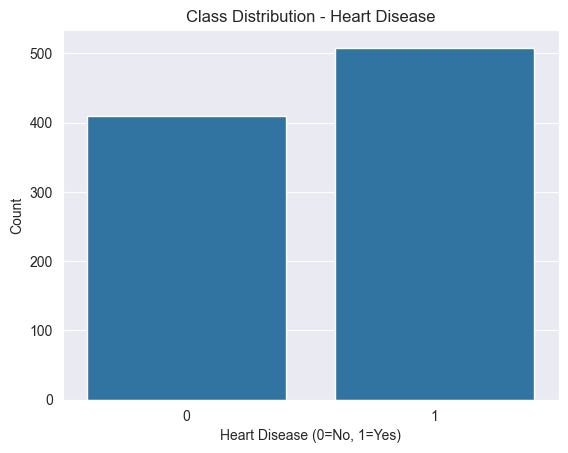

In [436]:
# import necessary libararies
import matplotlib.pyplot as plt
import seaborn as sns

# create a countplot as new figure
fig= sns.countplot(data= df, x='HeartDisease')
# set labels of the figure
fig.set_title('Class Distribution - Heart Disease')
fig.set_xlabel('Heart Disease (0=No, 1=Yes)')
fig.set_ylabel('Count')
plt.show()


The target class is distrbuted in 55% observations that related to a heart disease and 44% without heart disease. This gets quite close to an almost equal distribution. So the target class is reasonably balanced. With this slight deviation it can be considered that the class distribution will not introduce a bias to the final model.

Based on this distribution it can be determined that no resampling technique, such as oversampling or synthetic minority-sampling technique is needed to create a balance of the data.

### 5.3 Defining Evaluation Protocol and Data Distribution

This section takes a close look at the data in the dataset. This information is supposed to help to decide on an evaluation protocol. Therefore it basically can be choosen between 3 technique: 1. Holding back a validation dataset 2. Performing a k-Fold validarion or 3. Performing an iterated k-Foldvalidation.

In the followonh steps I will evaluate the amount and quality of observation. Based on this information a evalutation protocol can be defined.

In [437]:
# Showing the head of dataframe
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [438]:
# Check the quality of the data by using the info-method of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


The info-method of the Pandas datefraem prints information about the dataframe by displaying column name, Non-Null Count and the datatype of the column.
As in the call above can be seen the datasets consists of 918 observations. It can be seen that no missing or null values. Five features of the datasets are categorical features stored with datatype 'object'. The remaining columns hold numeric features. The column 'HeartDisease' represents the feature thats supposed to be predicted with datatype int64, a numeric value.

=> Reference https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

In [439]:
# shows descriptive statistics for numeric columns
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


The descriptive statistics give a good overview about the numeric columns. The first thing to look at is the average values. It can be observed that the averages lie between 0.2 and approx. 198. The columns represent a wide range of values. It can be seen that there are no zero values here either. At the same time, it can be seen that the values move within a very wide range. To prepare the data, it would be advisable to scale the data so that no value can have an unusually high influence on the model.

With regard to the evaluation protocol, it can be said that this is a moderately small data set of good quality. Due to the size of the dataset, it makes sense to work with the k-fold crossvalidation in any case. It would be even better to work with iterated k-fold validation. Since the latter method is very computationally intensive, the application depends on the computing resources available (my notebook). If the resources are not sufficient, the classic k-fold cross-validation is used.

In the next cell I will make the distribution of the data of the numerical features again in the form of boxplot diagrams. This should once again show the different value ranges.



/var/folders/s8/0n6kz3c55f9dg9x_j_m0cdk00000gn/T/ipykernel_64767/3382991793.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


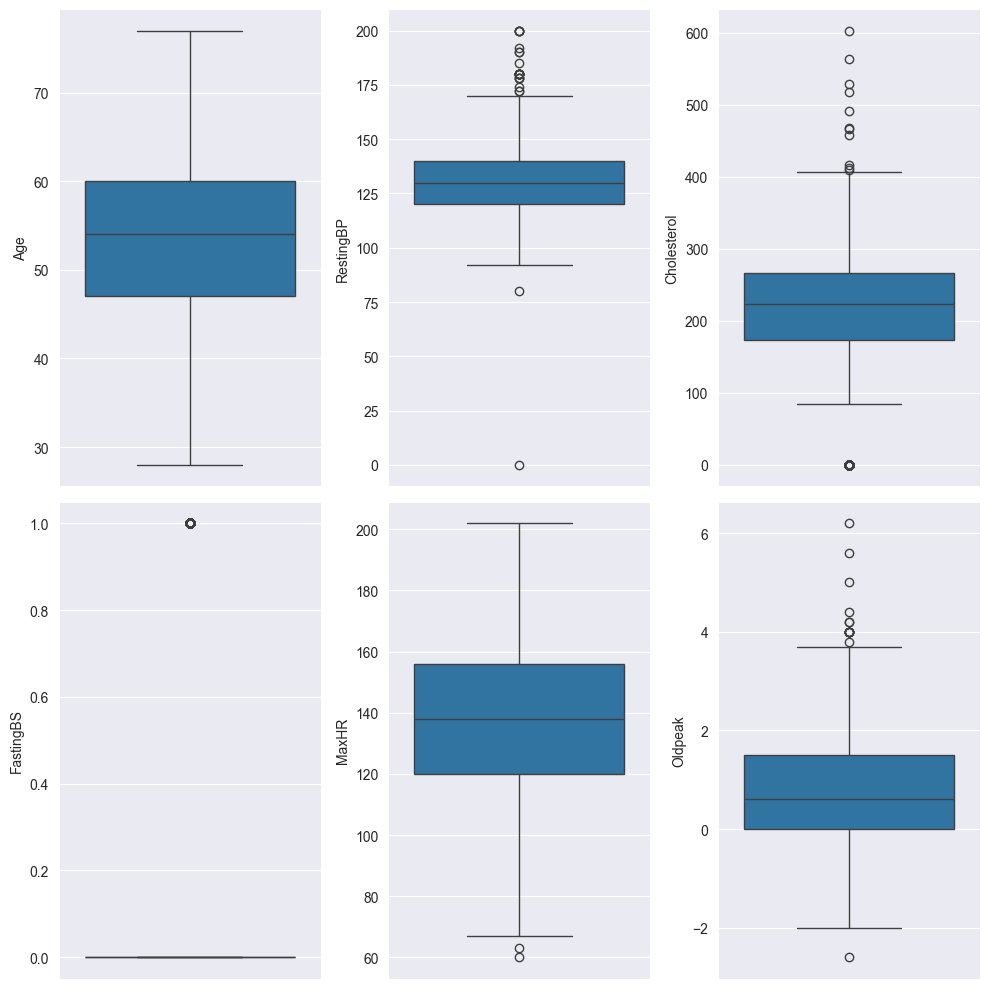

In [440]:
fig, axes= plt.subplots(2,3, figsize=(10,10))
sns.boxplot(data= df, y='Age' ,ax=axes[0,0])
sns.boxplot(data= df, y='RestingBP' ,ax=axes[0,1])
sns.boxplot(data= df, y='Cholesterol' ,ax=axes[0,2])
sns.boxplot(data= df, y='FastingBS' ,ax=axes[1,0])
sns.boxplot(data= df, y='MaxHR' ,ax=axes[1,1])
sns.boxplot(data= df, y='Oldpeak' ,ax=axes[1,2])
fig.tight_layout()
fig.show()


The boloxplot diagrams shown above illustrate the different value ranges for the individual properties. Additional they show existing outliers.

In the next steps we will take a closer look at the categorical values.

In [441]:
# create filter for categorical values
cat_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
# print head of df for categorical values
df[cat_columns].head()


,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


The cell above shows the head of the dataframe with only categorical features. In the next I will take a look at the unique values of a categorical features.

In [442]:
# print unique values an their occurance fo all categorical data
print([df[column].value_counts() for column in cat_columns])

[Sex
M    725
F    193
Name: count, dtype: int64, ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64, RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64, ExerciseAngina
N    547
Y    371
Name: count, dtype: int64, ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64]


The list above shows all the unique values and the number of them occurring in the categorical features.

What can be seen directly and very clearly here is that female persons only make up just under 26% of the values surveyed.  This is critical insofar as the resulting model shows risks in the prediction of heart disease for women. In fact, no statement can be made for women and the model will be biased in this respect.

Since this is a student research project that focuses on the creation and evaluation of a neural network, I will continue with the data set given here. Even without using a sampling method to represent women better or more evenly. That would go beyond the scope of this paper.

It should also be noted that the categorical data cannot be processed by a neural network in this way. The data must be processed in such a way that it is represented in numerical form.

### Summary Explorational Data Analysis

The following points were identified in the EDA:
- Equal distribution of the target classes
- No data cleaning is needed - non null-values
- The numerical values cover a very wide range -> the numeric value need to be scaled
- Categorical data represented in string values ->  must be converted into numerical values

The next section takes care of transforming the data.


## 6.  Preparing the Data

In the following steps, the data is prepared in such a way that it can be processed by a neural network.  The following steps are carried out for this:

- Splitting the data into "data" and "labels"
- Scaling of the numerical values
- Categorical values are converted into numerical values
- Transformation of the data from a pandas dataframe to a numpy array

### 6.1 Splitting the Data into "Features" Data and "Label" Data

In this section the data is splitted into data features and data labels. The data features represent the observations or features of the dataset. The data labels are the target values that are supposed to be predicted by the model. At this point the data is only dvided into features and labels. A division into trainig data and test date will take place with implementation of an k-fold procedure.

In [443]:
# divide dataframe into featues and labels
df_data = df.iloc[:, :len(df.columns)-1]
df_labels= df.iloc[:,-1]

### 6.2 Scaling Numerical Values

Within in this section the numeridal features will be scaled. This operation is necessary because we have seen in the exploratory data analysis that the value ranges of the numerical values vary greatly. Scaling is therefore necessary to ensure that the model is not biased by individual properties.

In [444]:
# defining method to scale data
def scale_numeric_values(df):

    """
    Scale numeric values in a pandas DataFrame.

    This function standardizes each numeric column by subtracting the mean of the column
    and dividing by the standard deviation. It's a process known as Z-score normalization,
    which transforms the data to have a mean of 0 and a standard deviation of 1.

    Parameters:
    df (pandas.DataFrame): A DataFrame containing the data to be scaled.
                           The function identifies numeric columns (both float64 and int64 types)
                           and applies scaling to them.

    Returns:
    pandas.DataFrame: The scaled DataFrame. Numeric columns are standardized,
                      while non-numeric columns remain unchanged.
    """

    num_cols = [col for col in df_data.columns if df_data[col].dtype in ['int64','float64']]

    for col in num_cols:
        df[col]= (df[col] - df[col].mean()) / df[col].std()

    return df

In [445]:
# checking dataframe before scaling
df_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [446]:
# method call to scale numeric values
df_data= scale_numeric_values(df_data)
# check scaled values
df_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.432359,M,ATA,0.410685,0.824621,-0.551041,Normal,1.382175,N,-0.831979,Up
1,-0.478223,F,NAP,1.490940,-0.171867,-0.551041,Normal,0.753746,N,0.105606,Flat
2,-1.750404,M,ATA,-0.129442,0.769768,-0.551041,ST,-1.524307,N,-0.831979,Up
3,-0.584238,F,ASY,0.302660,0.138964,-0.551041,Normal,-1.131539,Y,0.574398,Flat
4,0.051853,M,NAP,0.950812,-0.034736,-0.551041,Normal,-0.581664,N,-0.831979,Up


In [447]:
# check descriptive stats
df_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02
mean,-1.393221e-16,2.031781e-16,3.096047e-17,4.644070e-17,5.263280e-16,1.083616e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.704540e+00,-7.151097e+00,-1.817444e+00,-5.510410e-01,-3.016825e+00,-3.269699e+00
25%,-6.902531e-01,-6.695696e-01,-2.335765e-01,-5.510410e-01,-6.602179e-01,-8.319789e-01
50%,5.185271e-02,-1.294423e-01,2.212426e-01,-5.510410e-01,4.676419e-02,-2.694280e-01
75%,6.879435e-01,4.106850e-01,6.234947e-01,-5.510410e-01,7.537463e-01,5.743984e-01
max,2.490201e+00,3.651449e+00,3.695238e+00,1.812770e+00,2.560478e+00,4.981047e+00


The descriptive statistics of the numeric values in the dataframe shows that most of the means are equal zero or close to zero. This is a direct result of the scaling process. It shows that the data is centered around the mean. The standard deviation of all columns is shown as one. All numeric features share a common numeric scale without distorting differences in the numeric ranges. The uniform scale makes the features more comparable and potentially improves the performance of the model.

### 6.3 One Hot Encoding for Categorical Features

In the following section a so called 'one hot encoding' for the categorical data is performed. This is necessary hence the neurol network can only process numerical values.

In [448]:
# import NumPy for following operations
import numpy as np

def one_hot_encoding(df):

    """
    Perform one-hot encoding on categorical columns in a pandas DataFrame.

    This function identifies all columns with datatype 'object' as categorical.
    For each unique value in these categorical columns, it creates a new binary column
    in the DataFrame where 1 represents the presence of the unique value and 0 represents its absence.

    Parameters:
    df (pandas.DataFrame): The DataFrame on which one-hot encoding will be performed.
                           It should contain one or more columns with datatype 'object' for categorical data.

    Returns:
    pandas.DataFrame: A modified DataFrame with original categorical columns replaced
                      by their respective one-hot encoded binary columns.
    """
    # identify in categorical columns in the data frame
    cat_columns = [col for col in df.columns if df[col].dtype in ['object', 'categorical']]

    # iterate over each identified categorical column
    for cat_col in cat_columns:
        # get the unique values of each categorical column
        unique_values= df[cat_col].unique()
        # iterate over  each unique value
        for unique_val in unique_values:
            # create a new column for each unique value of the categorical column
            # new column name is combination of original column name and unique value
            df[str(cat_col)+'_'+str(unique_val)]= df[df[cat_col]==unique_val][cat_col]
            # in the new column replace the occurance of the unique value with 1
            df[str(cat_col)+'_'+str(unique_val)]= df[str(cat_col)+'_'+str(unique_val)].replace(unique_val, 1)
            # in the new column replace NaN values witj '0' indicating absence of the value
            df[str(cat_col)+'_'+str(unique_val)]= df[str(cat_col)+'_'+str(unique_val)].replace(np.NAN, 0)

        # drop the original column from the datafram
        df= df.drop(cat_col, axis= 1)

    # return the new dataframe
    return df

In [449]:
df_data= one_hot_encoding(df_data)
df_data.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,Sex_F,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_ASY,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,RestingECG_LVH,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Up,ST_Slope_Flat,ST_Slope_Down
0,-1.432359,0.410685,0.824621,-0.551041,1.382175,-0.831979,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.478223,1.490940,-0.171867,-0.551041,0.753746,0.105606,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.750404,-0.129442,0.769768,-0.551041,-1.524307,-0.831979,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.584238,0.302660,0.138964,-0.551041,-1.131539,0.574398,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.051853,0.950812,-0.034736,-0.551041,-0.581664,-0.831979,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,-1.538374,-0.669570,1.281725,-0.551041,1.303621,-0.831979,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,-0.902283,-0.129442,0.349232,-0.551041,1.303621,-0.831979,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,0.051853,-1.209697,0.084111,-0.551041,0.203871,-0.831979,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,-1.750404,0.410685,0.074969,-0.551041,-0.267450,0.574398,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,-0.584238,-0.669570,0.778910,-0.551041,-0.660218,-0.831979,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In the output of the previous cell can be seen that all categorical columns were replaced wit new columns for each unique value indicating with ones and zeros the presence or absence of the value.

### 6.4 Transforming Dataframe into NumPy Array

At this point the final step is missing. After scaling and transforming the data it is time change the data to make it for the neural network readable. Currently the data is in form of a pandas dataframe. To be processed by a neural network the pandas dataframe will be changed into matrix format as a 2 dimensional numpy array.

In [450]:
# import numpy library
import numpy as np

data= df_data.to_numpy()
labels= df_labels.to_numpy()

print(f'Shape of features: {data.shape}; Dimensions: {data.ndim}')
print(f'Shape of features: {labels.shape}; Dimensions: {data.ndim}')

Shape of features: (918, 20); Dimensions: 2
Shape of features: (918,); Dimensions: 2


# 7 Developing a Model

In this section a baseline model is build, trained and evaluated. In order to increase the efficiency in this work the steps of building, training the model are encapsulated into methods called 'build_model()', 'train_binary_model()' and 'plot_ROC. Finally a method is provided to print the ROC. The aim of this approach is to reuse these building blocks in latter parts of the report. Especially to over fit the model this methods can be used to create and train models easily.

In [467]:
# import libraries to build model
from tensorflow.keras import models
from tensorflow.keras import layers, regularizers

In [503]:
def build_model(input_shape, num_neurons= 32, activation='relu', n_hidden_layers= 1, loss='binary_crossentropy', regularize=False, dropout=False):

    """
    Constructs and compiles a Sequential neural network model for binary classification.

    This function builds a deep learning model with a specified number of hidden layers, neurons per layer,
    and activation function. The model is designed for binary classification tasks, with a single output
    neuron using the sigmoid activation function. The model is compiled with the Adam optimizer and a
    specified loss function.

    Parameters:
    - input_shape (int): The number of features in the input dataset. This specifies the number of neurons in the input layer.
    - num_neurons (int, optional): The number of neurons in each hidden layer. Defaults to 32.
    - activation (str, optional): The activation function to use for each hidden layer. Defaults to 'relu'.
    - n_hidden_layers (int, optional): The number of hidden layers in the network. Defaults to 1.
    - loss (str, optional): The loss function to use for compiling the model. Defaults to 'binary_crossentropy'.

    Returns:
    - keras.engine.sequential.Sequential: A compiled Keras Sequential model ready for training.
    """


    # initialize the model
    model= models.Sequential()
    # define an input layer for the model
    if regularize:
        if dropout:
            model.add(layers.Dense(num_neurons, kernel_regularizer= regularizers.l2(0.001), activation= activation, input_shape=(input_shape, )))
            model.add(layers.Dropout(0.5))
        else:
            model.add(layers.Dense(num_neurons, kernel_regularizer= regularizers.l2(0.001), activation= activation, input_shape=(input_shape, )))
    else:
        model.add(layers.Dense(num_neurons, activation= activation, input_shape=(input_shape, )))

    # loop to create the required amount of hidden layers
    for layer in range(n_hidden_layers):
        if regularize:
            if dropout:
                model.add(layers.Dense(num_neurons, kernel_regularizer= regularizers.l2(0.001), activation=activation))
                model.add(layers.Dropout(0.5))
            else:
                model.add(layers.Dense(num_neurons, kernel_regularizer= regularizers.l2(0.001), activation=activation))
        else:
            # add layer with defined nums of neurons, activation function
            model.add(layers.Dense(num_neurons, activation=activation))

    # Define output layer
    model.add(layers.Dense(1, activation='sigmoid'))

    # compile model and set params
    model.compile(
        loss= loss,
        optimizer= 'adam',
        metrics= ['accuracy']

    )
    # return model
    return model

# Reference for model.compile https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/
# Reference Lecture 4.407 Dropout

In [453]:
# build a model in order to demonstrate functionality of method
model= build_model(input_shape= data.shape[1], n_hidden_layers=3)

In [454]:
# print model summary of previous created model
model.summary()

Model: "sequential_1066"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7920 (Dense)          (None, 32)                672       
                                                                 
 dense_7921 (Dense)          (None, 32)                1056      
                                                                 
 dense_7922 (Dense)          (None, 32)                1056      
                                                                 
 dense_7923 (Dense)          (None, 32)                1056      
                                                                 
 dense_7924 (Dense)          (None, 1)                 33        
                                                                 
Total params: 3873 (15.13 KB)
Trainable params: 3873 (15.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [456]:
# import necessary libs
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def train_binary_model(num_folds, data, labels, model ,epochs=20, batch_size= 32, verbose= 1):
    """
    Trains a provided model using K-fold cross-validation and returns the ROC curve metrics,
    AUC scores, and the validation score of the last fold.

    The function performs K-fold cross-validation on the given dataset. For each fold, it
    trains the provided model on the training set and evaluates it on the validation set. It
    calculates the ROC AUC scores and ROC curve metrics (FPR, TPR, thresholds) for each fold.
    The function returns these metrics along with the validation score of the last fold.

    Parameters:
        - num_folds (int): Number of folds to use in K-fold cross-validation.
        - data (array-like): The input features to train the model.
        - labels (array-like): The target labels for the input data.
        - model (keras.Model): The pre-defined model to be trained.
        - epochs (int, optional): The number of epochs to train the model. Defaults to 20.
        - batch_size (int, optional): The size of the batches for training the model. Defaults to 32.
        - verbose (int, optional): Verbosity mode for training the model. Defaults to 1.

    Returns:
        - arr_roc (list): A list of tuples (FPR, TPR, thresholds) for the ROC curve of each fold.
        - auc_scores (list): A list of AUC scores for each fold.
        - val_score (tuple): The validation loss and accuracy of the last fold.
        - history (History): A Keras History object from the training of the last fold.
    """

    auc_scores= []
    arr_roc= []
    model_hostories= []

    # initialize k-fold
    kf= KFold(n_splits= num_folds, shuffle= True, random_state= 42)

    for train_index, val_index in kf.split(data):
        data_train, data_validation = data[train_index], data[val_index]
        labels_train, labels_validation= labels[train_index], labels[val_index]


        model= model

        # train model
        history = model.fit(
            data_train,
            labels_train,
            epochs=epochs,
            batch_size= batch_size,
            verbose= verbose
        )

        model_hostories.append(history)

        probs= model.predict(data_validation)

        auc = roc_auc_score(labels_validation, probs)
        auc_scores.append(auc)

        fpr, tpr, thresholds= roc_curve(labels_validation, probs)

        arr_roc.append((fpr, tpr, thresholds))

        # Print the validation score
        val_score = model.evaluate(data_validation, labels_validation)
        print(f'Validation Score {val_score}')

    return arr_roc, auc_scores, val_score, history

In [457]:
def plot_roc(n_fold, arr_fold, auc_score):

    """
    Plots the Receiver Operating Characteristic (ROC) curve for a given fold of a cross-validation process.

    This function creates and displays a ROC curve, a graphical representation of the trade-off
    between the true positive rate (TPR) and false positive rate (FPR) for a classifier. The area under
    the curve (AUC) score is also displayed as part of the plot, providing a quantitative measure of
    the model's performance.

    Parameters:
    - n_fold (int): The index of the fold in a cross-validation process, used for the plot title.
    - arr_fold (tuple): A tuple containing two elements, FPR and TPR, for the ROC curve.
                        Typically structured as [fpr, tpr], where fpr is an array of false positive rates
                        and tpr is an array of true positive rates.
    - auc_score (float): The area under the ROC curve score, quantifying overall model performance.
                         A higher AUC score indicates better model performance.

    Returns:
    - N/A
    """

    # Plotting ROC curve for current fold
    plt.figure()
    plt.plot(arr_fold[0], arr_fold[1], label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - Fold {n_fold + 1}')
    plt.legend(loc="lower right")
    plt.show()


After defining all necessary methods. It can be started to build a baseline model. The purpose of the model is to build binary classification model with statistical power. If the model achieves an accuracy of 50%, then it is no better than a guess. If the model can achieve an accuracy of more than 50%, it is better than a random decision.

Following approach is applied:
1. Build the model with corresponding parameters (e.g. number of hidden layer)
2. The model is trained and validated with specific values (e.g. epochs= 20, k-folds =5)
3. Plotting the ROC to evaluate model performance

In the following steps the above mentioned approach is demonstrated to create a baseline model

In [458]:
# build a base model
# number base model hidden layers
bm_n_hidden_layers= 5
# base model k-folds
bm_k_folds= 5

# method call to build the model with defined parameters
bm_model= build_model(input_shape= data.shape[1], n_hidden_layers= bm_n_hidden_layers)
# method call to train binary model and aigning the return values to corresponding variables
bm_arr_roc, bm_auc_scores, bm_val_score, bm_history= train_binary_model(num_folds=bm_k_folds, data= data, labels= labels, model= bm_model)

Epoch 1/20
23/23 [==============================] - 6s 3ms/step - loss: 0.6229 - accuracy: 0.7207
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.8501
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8678
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8828
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 0.3030 - accuracy: 0.8883
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 0.2983 - accuracy: 0.8951
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.8896
Epoch 8/20
23/23 [==============================] - 0s 2ms/step - loss: 0.2785 - accuracy: 0.9060
Epoch 9/20
23/23 [==============================] - 0s 2ms/step - loss: 0.2796 - accuracy: 0.8937
Epoch 10/20
23/23 [==============================] - 0s 2ms/step - loss: 0.2694 - accuracy: 0.9046
Epoch 11/20
23/23 [

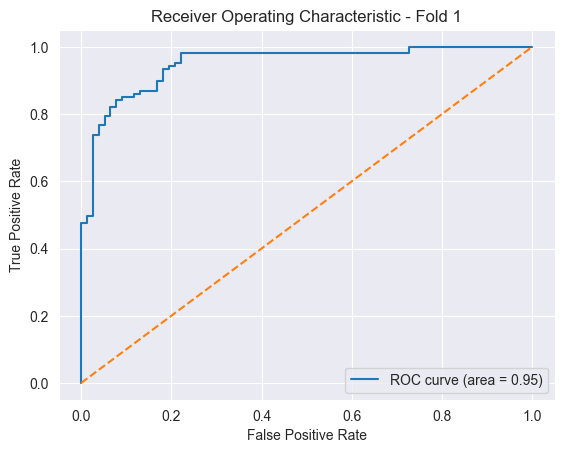

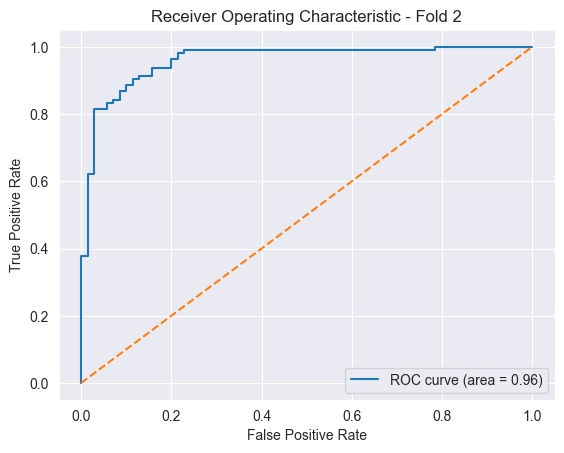

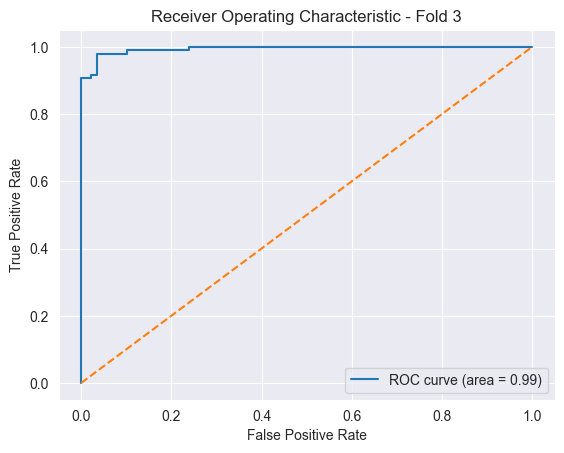

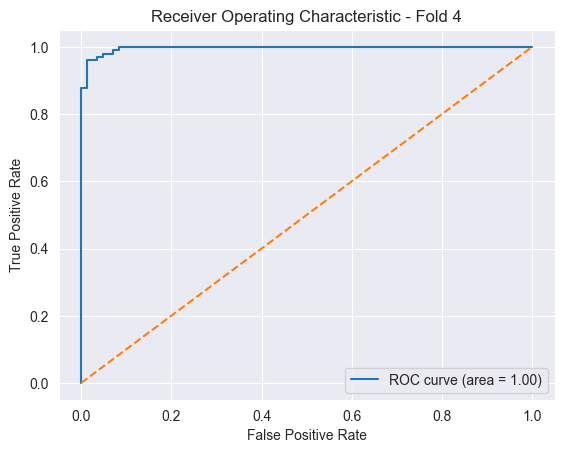

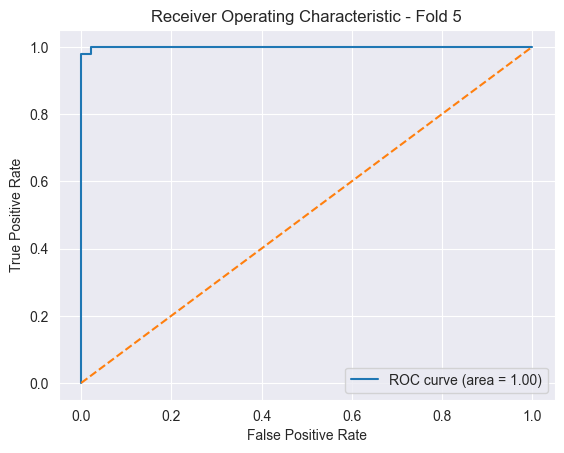

In [459]:
for n_fold in range(len(bm_arr_roc)):
    plot_roc(n_fold, bm_arr_roc[n_fold], bm_auc_scores[n_fold])

The plots that can be seen above show the development of the model in the course of time. It can be seen that model has already in fold 1 a very good performance. It has the chance of 93% to correctly distinguish  between the positive and negative class. In fold 2 the model is improving slightly. In fold 3 and 4 the model still performs very well and the AUC is close to 1. In the final fold has an AUC of 1.00 that means that the model has perfectly classified all positive examples of the fold. This could indicate already a overfitting. It is quite rare for a model to achieve perfect classification unless the data is very simple or the model were able to memorize the training data.

Now, lets have a look at the over all loss and accuracy of the validation data:

In [460]:
# print validation score of the model
print(f'Basline Model Loss: {bm_val_score[0]} Accuracy: {bm_val_score[1]}')

Basline Model Loss: 0.03310832381248474 Accuracy: 0.9836065769195557


The baselien model indicates a loss of roughly .63 and a accuracy. That is very good for a baseline model. This could indicate that the model is either generalizing well and not overfitting significantly.

In the next chapter three different approaches are evaluated different methods of overfitting the model. The aim is to identifiy the so called 'sweet spot' for number of hiddenlayers, layer capacity and number of epochs.

## 7 Scaling - Overfitting the Model

The aim of this section is to actively overfit the model to investigate the best parameters for the model architecture. This concerns mostly the numer of hidden layer, the number of neurons per layer and finally the number of epochs ( one epoch is a complete pass through of the trainings data).

In [461]:
def overfitting_layers(data, labels, max_hidden_layers= 5, batch_size= 5, verbose=0):

    """
    Trains and evaluates models with varying numbers of hidden layers to investigate overfitting.

    This function iteratively builds and trains models with an increasing number of hidden layers
    up to 'max_hidden_layers'. Each model is trained using K-fold cross-validation, and the training
    and validation losses and accuracies are recorded. This helps in understanding how the number of
    hidden layers impacts model performance and overfitting.

    Parameters:
        - data (numpy.ndarray): The input data used for training and validation.
        - labels (numpy.ndarray): The target labels for the input data.
        - max_hidden_layers (int, optional): The maximum number of hidden layers to test. Defaults to 5.
        - batch_size (int, optional): The batch size for training each model. Defaults to 5.
        - verbose (int, optional): Verbosity mode for model training. 0 = silent, 1 = progress bar, etc. Defaults to 0.

    Returns:
        - dict: A dictionary containing the following keys and values:
            - 'train_losses': A list of the final training losses for each model.
            - 'train_accuracies': A list of the final training accuracies for each model.
            - 'val_losses': A list of the validation losses for each model.
            - 'val_accuracies': A list of the validation accuracies for each model.
            - 'model_histories': A list of Keras History objects from the training of each model.
    """

    val_accuracies= []
    val_losses= []
    model_histories= []
    train_losses= []
    train_accuracies= []

    for i in range(max_hidden_layers):
        print(f'Build model with {i+1} hidden layer... \b')
        model= build_model(data.shape[1], n_hidden_layers=(i+1))
        # verbose is set to 'o' to get only summary information for the specific model
        print(f'Start training and validating the model with {i+1} layers... \b')
        arr_roc, auc_scores, val_score, history= train_binary_model(5, data, labels, model, max_epochs, batch_size, verbose)

        train_losses.append(history.history['loss'][-1])
        train_accuracies.append(history.history['accuracy'][-1])

        val_losses.append(val_score[0])
        val_accuracies.append(val_score[1])




    return {
        'train_losses': train_losses,
        'train_accuracies': train_accuracies,
        'val_losses': val_losses,
        'val_accuracies': val_accuracies,
        'model_histories': model_histories
    }

In [294]:
def overfitting_neurons(data, labels, ls_neurons, max_epochs=20, batch_size= 5, verbose=0):

    """
    Trains and evaluates models with varying numbers of neurons per hidden layer.

    This function iteratively builds and trains models with different numbers of neurons in their
    hidden layers, specified by the 'ls_neurons' list. Each model is trained using K-fold cross-validation,
    and the training and validation losses and accuracies are recorded to understand the impact of
    neuron count on overfitting.

    Parameters:
        - data (numpy.ndarray): The input data used for training and validation.
        - labels (numpy.ndarray): The target labels for the input data.
        - ls_neurons (list of int): A list of integers where each integer specifies the number of
          neurons in the hidden layers for a model.
        - max_epochs (int, optional): The maximum number of epochs for training each model. Defaults to 20.
        - batch_size (int, optional): The batch size for training each model. Defaults to 5.
        - verbose (int, optional): Verbosity mode for model training. 0 = silent, 1 = progress bar, etc. Defaults to 0.

    Returns:
        - dict: A dictionary containing the following keys and values:
            - 'train_losses': A list of the final training losses for each model.
            - 'train_accuracies': A list of the final training accuracies for each model.
            - 'val_losses': A list of the validation losses for each model.
            - 'val_accuracies': A list of the validation accuracies for each model.
            - 'model_histories': A list of Keras History objects from the training of each model.
    """

    val_accuracies= []
    val_losses= []
    model_histories= []
    train_losses= []
    train_accuracies= []

    for num_neurons in ls_neurons:
        print(f'Build model with {num_neurons} neurons per hidden layer... \b')
        model= build_model(data.shape[1], num_neurons= num_neurons)
        # verbose is set to 'o' to get only summary information for the specific model
        print(f'Start training and validating the model with {num_neurons} neurons per hidden layer... \b')
        arr_roc, auc_scores, val_score, history= train_binary_model(5, data, labels, model, epochs=max_epochs, batch_size= batch_size, verbose= verbose)

        train_losses.append(history.history['loss'][-1])
        train_accuracies.append(history.history['accuracy'][-1])

        val_losses.append(val_score[0])
        val_accuracies.append(val_score[1])




    return {
        'train_losses': train_losses,
        'train_accuracies': train_accuracies,
        'val_losses': val_losses,
        'val_accuracies': val_accuracies,
        'model_histories': model_histories
    }

In [329]:
def overfitting_epochs(data, labels, max_epochs, batch_size= 5, verbose=0):

    """
    Trains and evaluates a model for a range of epochs to analyze overfitting.

    This function iteratively builds and trains a model for a varying number of epochs,
    starting from 1 up to 'max_epochs'. For each epoch count, it trains the model using
    K-fold cross-validation and records the training and validation losses and accuracies.
    This helps in understanding how the number of epochs affects model performance and overfitting.

    Parameters:
        - data (numpy.ndarray): The input data used for training and validation.
        - labels (numpy.ndarray): The target labels for the input data.
        - max_epochs (int): The maximum number of epochs for training each model.
        - batch_size (int, optional): The batch size for training the model. Defaults to 5.
        - verbose (int, optional): Verbosity mode for model training. 0 = silent, 1 = progress bar, etc. Defaults to 0.

    Returns:
        - dict: A dictionary containing the following keys and values:
            - 'train_losses': A list of the final training losses for each epoch count.
            - 'train_accuracies': A list of the final training accuracies for each epoch count.
            - 'val_losses': A list of the validation losses for each epoch count.
            - 'val_accuracies': A list of the validation accuracies for each epoch count.
            - 'model_histories': A list of Keras History objects from the training for each epoch count.
    """

    val_accuracies= []
    val_losses= []
    model_histories= []
    train_losses= []
    train_accuracies= []

    for i in range(1, max_epochs):
        epochs= i
        print(f'Build model with {i} epochs... \b')
        model= build_model(data.shape[1])
        # verbose is set to 'o' to get only summary information for the specific model
        print(f'Start training and validating the model with {i} epochs... \b')
        arr_roc, auc_scores, val_score, history= train_binary_model(5, data, labels, model, epochs, batch_size, verbose)

        train_losses.append(history.history['loss'][-1])
        train_accuracies.append(history.history['accuracy'][-1])

        val_losses.append(val_score[0])
        val_accuracies.append(val_score[1])




    return {
        'train_losses': train_losses,
        'train_accuracies': train_accuracies,
        'val_losses': val_losses,
        'val_accuracies': val_accuracies,
        'model_histories': model_histories
    }

In [463]:
def plot_acc_loss(train_accuracies, val_accuracies, train_losses, val_losses, **kwargs):

    """
    Plots the training and validation accuracies and losses.

    This function creates a two-panel figure: the first panel shows the training and validation accuracies,
    and the second panel shows the training and validation losses. The x-axis of the plots can represent
    either the number of hidden layers, the number of neurons per layer, or the number of epochs, depending
    on the arguments provided in **kwargs.

    Parameters:
    - train_accuracies (list or array): A list or array of training accuracies for each configuration.
    - val_accuracies (list or array): A list or array of validation accuracies for each configuration.
    - train_losses (list or array): A list or array of training losses for each configuration.
    - val_losses (list or array): A list or array of validation losses for each configuration.
    - **kwargs: Keyword arguments that can include:
        - list_neurons (list or array, optional): A list or array of the number of neurons per layer used in each configuration.
        - num_epochs (int, optional): The number of epochs used in each configuration.

    Returns:
    - N/A
    """

    list_neurons= kwargs.get('list_neurons', None)
    num_epochs= kwargs.get('num_epochs', None)

    # set figure
    plt.figure(figsize=(12, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(range(len(train_accuracies)), train_accuracies, label='Training Accuracy')
    plt.plot(range(len(val_accuracies)), val_accuracies, label='Validation Accuracy')
    if list_neurons:
        plt.xticks(range(len(list_neurons)), list_neurons, rotation= 90)
        plt.xlabel('Number of Neurons per Layers')
    if num_epochs:
        plt.xticks(range(1, num_epochs), rotation= 90)
        plt.xlabel('Number of Epochs')
    else:
        plt.xticks(range(len(val_accuracies)), rotation= 90)
        plt.xlabel('Number of Hidden Layers')
    plt.title('Training and Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
    plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
    if list_neurons:
        plt.xticks(range(len(list_neurons)), list_neurons, rotation= 90)
        plt.xlabel('Number of Neurons per Layers')
    if num_epochs:
        plt.xticks(range(1, num_epochs), rotation= 90)
        plt.xlabel('Number of Epochs')
    else:
        plt.xticks(range(len(val_accuracies)), rotation=90)
        plt.xlabel('Number of Hidden Layers')
    plt.title('Training and Validation Loss')

    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


### Overfitting Layers

In [365]:
# train and evaluate models with up to 50 hidden layers to analyze overfitting
results= overfitting_layers(data, labels, 50, batch_size=32)

Build model with 1 hidden layer...
Start training and validating the model with 1 layers...
6/6 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8750
Validation Score [0.40313205122947693, 0.875]
6/6 [==============================] - 0s 2ms/step - loss: 0.3685 - accuracy: 0.8913
Validation Score [0.36853018403053284, 0.8913043737411499]
6/6 [==============================] - 0s 2ms/step - loss: 0.3227 - accuracy: 0.9239
Validation Score [0.32269999384880066, 0.9239130616188049]
6/6 [==============================] - 0s 2ms/step - loss: 0.3312 - accuracy: 0.9290
Validation Score [0.3312152028083801, 0.9289617538452148]
6/6 [==============================] - 0s 2ms/step - loss: 0.1154 - accuracy: 0.9617
Validation Score [0.11542798578739166, 0.9617486596107483]
Build model with 2 hidden layer...
Start training and validating the model with 2 layers...
6/6 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.8696
Validation Score [0.66901

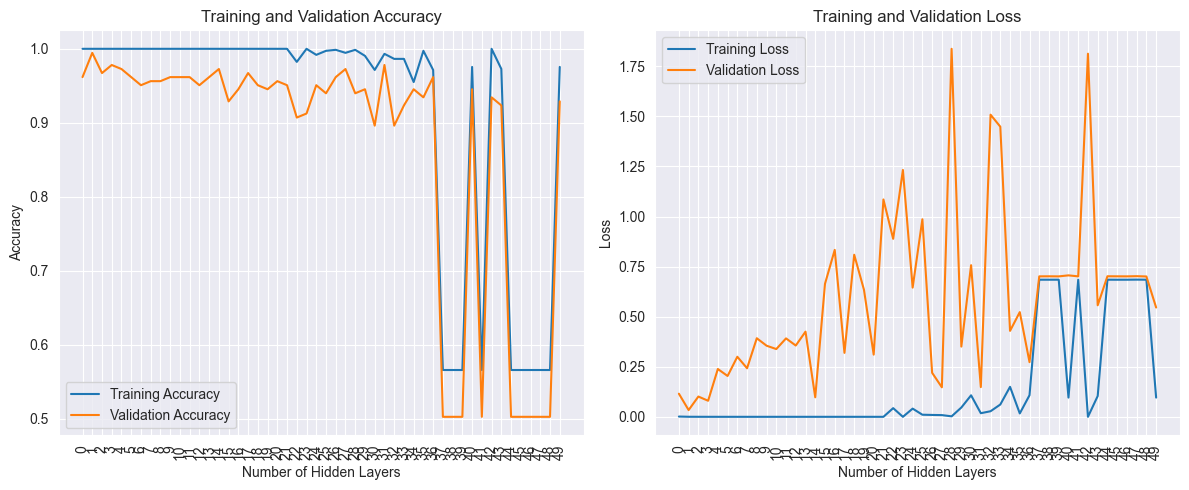

In [370]:
# plot training / val loss and accuracy against number of hidden layers
plot_acc_loss(results['train_accuracies'], results['val_accuracies'], results['train_losses'], results['val_losses'])

In the cells above multiple models were trained with up to 50 hidden layers. The plots shows traings and validation accurcies and trainings and validation loss plotted against the number of hidden layers.

Ideally traings and validation accuricies should follow similar patterns. In the plot above there a places where the validation accuricy drops significantly below the trainings accuracy. This can be a indicator of overfitting.

The trainings and validation loss should decrease and stabilize when the model learns. With the increase of hidden layers the validation loss fluctuate significantly. This could be interpreted as a sign of overfitting. The plot shows sharp spikes in the validation loss as well. This might be because the model is overfitting and it is not enough generalizing well to unseen data.

### Train Model with Bigger Network


In [371]:
# create list different amounts of neurons
ls_num_neurons= list(range(32, 1024, 32))
# train and evaluate models with up to 1024 neurons with an increas of 32 neurons per iteration
results= overfitting_neurons(data, labels, ls_num_neurons, batch_size= 32, verbose=0)

Build model with 32 neurons per hidden layer...
Start training and validating the model with 32 neurons per hidden layer...
6/6 [==============================] - 0s 2ms/step - loss: 0.3003 - accuracy: 0.8587
Validation Score [0.3003041744232178, 0.8586956262588501]
6/6 [==============================] - 0s 2ms/step - loss: 0.2840 - accuracy: 0.8913
Validation Score [0.28403395414352417, 0.8913043737411499]
6/6 [==============================] - 0s 3ms/step - loss: 0.2109 - accuracy: 0.9130
Validation Score [0.2108502984046936, 0.9130434989929199]
6/6 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8525
Validation Score [0.3390289545059204, 0.8524590134620667]
6/6 [==============================] - 0s 2ms/step - loss: 0.1758 - accuracy: 0.9235
Validation Score [0.1757516860961914, 0.9234972596168518]
Build model with 64 neurons per hidden layer...
Start training and validating the model with 64 neurons per hidden layer...
6/6 [==============================]

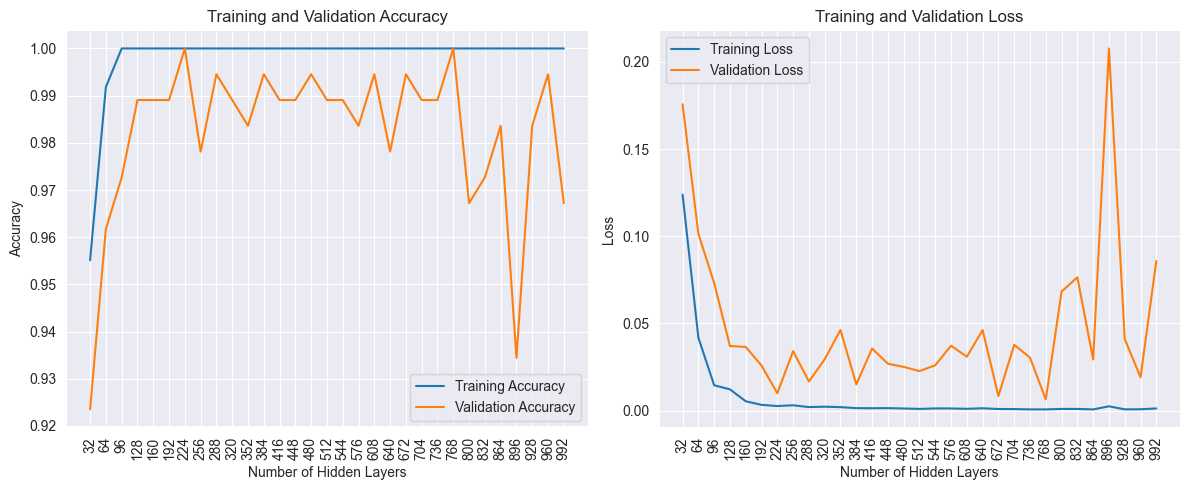

In [372]:
# plot training / val loss and accuracy against number of neurons
plot_acc_loss(results['train_accuracies'], results['val_accuracies'], results['train_losses'], results['val_losses'], list_neurons= ls_num_neurons)

The plots show the trainings, validation accuracies and trainings, validation losses along with increasing numbers of hidden neurons.

The trainings trainings accuracy stabillize with increasing numbers of neurons. It can be suggested that the model is big enough to fit the trainings data. The validation accuracy is general high but shows spikes and  break-ins. This indicates that some neuron counts lead to better generalization than others.

The trainings loss decreases and keeps low accross different neuron counts. Thats a quite typical behavior dealing with training data. The validation loss spikes at some neuron count. That can indicate that some neuron counts are not generalizing enough. Additionally it can be a sign for overfitting. As higher the number of neurons becomes the higher the spikes in validation loss. This behavior intensifies in the course of higher numbers of neurons per layer.

In general there does not to be appear a consistent trend of overfitting across the range of neurons. However at specific point the validation accuracy and loss spikes may indicate overfitting.

### Train for more epochs

In [373]:
# define max numbers of epochs
max_epochs= 100
# create and evaluate models up to a model with 100 epochs
results= overfitting_epochs(data, labels, max_epochs, batch_size=50, verbose=0)

Build model with 1 epochs...
Start training and validating the model with 1 epochs...
6/6 [==============================] - 0s 2ms/step - loss: 0.6012 - accuracy: 0.6739
Validation Score [0.6012018322944641, 0.6739130616188049]
6/6 [==============================] - 0s 3ms/step - loss: 0.4710 - accuracy: 0.8370
Validation Score [0.4709647595882416, 0.8369565010070801]
6/6 [==============================] - 0s 2ms/step - loss: 0.4525 - accuracy: 0.8370
Validation Score [0.45252570509910583, 0.8369565010070801]
6/6 [==============================] - 0s 2ms/step - loss: 0.4966 - accuracy: 0.7705
Validation Score [0.49659135937690735, 0.7704917788505554]
6/6 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.8415
Validation Score [0.38576656579971313, 0.8415300250053406]
Build model with 2 epochs...
Start training and validating the model with 2 epochs...
6/6 [==============================] - 0s 2ms/step - loss: 0.6081 - accuracy: 0.7065
Validation Score [0.60806

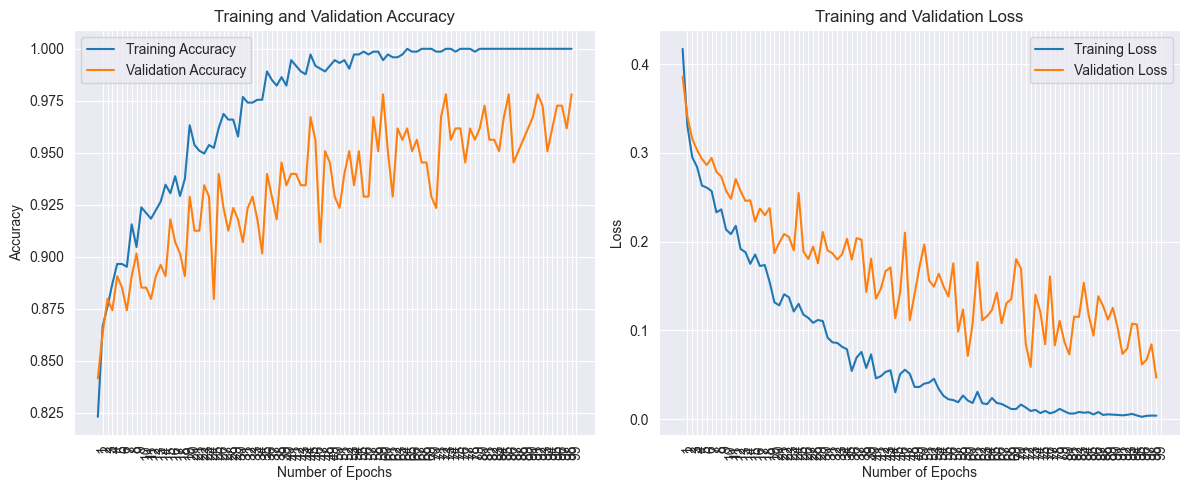

In [374]:
# plot training / val loss and accuracy against number of trained epochs
plot_acc_loss(results['train_accuracies'], results['val_accuracies'], results['train_losses'], results['val_losses'], num_epochs= max_epochs)

The plots above shows the trainings, validation accuracies and trainings, validations loss in over the course of different number of epochs during the training of the neural network.

Having a closer look at the accuracies it can be noticed that the training accuracy is improving consistantly as the number of epochs is increasing. The validation accuracy develops in a similar way. However, the increase decreases after some time and the training accuracy fluctuates. That suggest that the model is not necessarily improving with increasing numbers of epochs beyond a certain point.

This behavior can be observed for the loss, too. The loss decreases with increased epochs. The drop in validation loss flattens out after a certain point and the variability also increases. This could be an indicator that the model starts overfitting.

In both plots there is no clear and consistent divergence between the training and validation metrics. The trainings metrics improves and the validation metrics stagnate or get worse. The fluctuation could be an indicator of overfitting but not in a classiscal manner as shown in other examples during the lectures.

#### Conclusion

The number of hidden layers is the key factor to the ability to lear. At a certain point to many layers can lead to overfitting or a certain 'noise' in the model. The number of neurons is influencing the ability to learn complex data. To few neurons are not able to grasp complexity, while to many cause the model to overfit. The plots indicate a sweet spot where the optimal range is reache. The number of epochs control how long the model is trained. Undetraining (to less epochs) do not allow the model to learn adequately. Overtraining can lead to overfitting, when the model reminds the data to well. The plots showed some points, where number of epochs was balanced.

In general all plots show some sweet spots for the observed parameters. Nevertheless it was not able to observe a clear overfitting. The overfitting was at a certain point indicated by an increase of spikes or higher fluctuation for the validation metrics.

In the next section a grid search will be applied to find the best combination of parameters.

## 8 Regularize Model and Hyperparameter Tuning
-> Adding Weight regularization
-> Adding dropout rate


In [495]:
# define parameter Grid

param_grid= {
    'activation' : ['relu', 'tanh'],
    'num_neurons': [32, 64, 96],
    'num_hidden_layers': [1,2,3,4,5],
    'regularizers': [True, False],
    'dropout': [True, False]
}

In [504]:
from itertools import product

# Looping over all keys of dict
paramcombinations= list(product(*param_grid.values()))

results= {}

for params in paramcombinations:
    print(f'Building Model with following hyperparamerters: Activaiton= {params[0]}, Number Neurons= {params[1]}, Hiddenlayer= {params[2]}, Regularize: {params[3]}, Dropout: {params[4]}')
    model= build_model(data.shape[1], activation= params[0], num_neurons= params[1], n_hidden_layers= params[2], regularize= params[3], dropout= params[4])
    arr_roc, auc_scores, val_score, history= train_binary_model(5, data, labels, model, verbose=0)
    results[params]={
        'arr_roc': arr_roc,
        'auc_scores': auc_scores,
        'val_scores': val_score,
        'history': history
    }


Building Model with following hyperparamerters: Activaiton= relu, Number Neurons= 32, Hiddenlayer= 1, Regularize: True, Dropout: True
6/6 [==============================] - 0s 2ms/step - loss: 0.3856 - accuracy: 0.8641
Validation Score [0.38557055592536926, 0.864130437374115]
6/6 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8913
Validation Score [0.3181793689727783, 0.8913043737411499]
6/6 [==============================] - 0s 2ms/step - loss: 0.2918 - accuracy: 0.9076
Validation Score [0.2918342053890228, 0.907608687877655]
6/6 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 0.8525
Validation Score [0.39792633056640625, 0.8524590134620667]
6/6 [==============================] - 0s 2ms/step - loss: 0.3225 - accuracy: 0.8689
Validation Score [0.3225019574165344, 0.868852436542511]
Building Model with following hyperparamerters: Activaiton= relu, Number Neurons= 32, Hiddenlayer= 1, Regularize: True, Dropout: False
6/6 [============

In [475]:
results.keys()
results[('relu', 64, 2, True)]['val_scores']

[0.026554713025689125, 0.9836065769195557]

In [509]:
data_for_df= []
# Assuming results is already populated with the model outcomes
for params, metrics in results.items():
    activation, num_neurons, num_hidden_layers, regularizers, dropout = params

    model_data= {
        'activation': activation,
        'num_neurons': num_neurons,
        'num_hidden_layers': num_hidden_layers,
        'regularizers': regularizers,
        'dropout': dropout,
        'validation_loss': metrics['val_scores'][0],
        'validation_accuracy': metrics['val_scores'][1]
    }

    data_for_df.append(model_data)

df_results= pd.DataFrame(data_for_df)


In [517]:
df_results.sort_values('validation_accuracy', ascending= False)[:20]

,activation,num_neurons,num_hidden_layers,regularizers,dropout,validation_loss,validation_accuracy
30,relu,64,3,False,True,0.007288,1.000000
26,relu,64,2,False,True,0.019205,0.994536
95,tanh,64,4,False,False,0.038652,0.994536
114,tanh,96,4,False,True,0.024099,0.994536
34,relu,64,4,False,True,0.011221,0.994536
35,relu,64,4,False,False,0.017862,0.994536
47,relu,96,2,False,False,0.050563,0.994536
51,relu,96,3,False,False,0.021007,0.994536
119,tanh,96,5,False,False,0.063509,0.989071
33,relu,64,4,True,False,0.145431,0.989071


In [520]:
df_results[(df_results['dropout'] == True)&(df_results['regularizers']== True)].sort_values('validation_accuracy', ascending= False)

,activation,num_neurons,num_hidden_layers,regularizers,dropout,validation_loss,validation_accuracy
48,relu,96,3,True,True,0.298438,0.896175
36,relu,64,5,True,True,0.357998,0.896175
52,relu,96,4,True,True,0.359904,0.896175
56,relu,96,5,True,True,0.341118,0.890710
32,relu,64,4,True,True,0.341527,0.890710
40,relu,96,1,True,True,0.307296,0.890710
16,relu,32,5,True,True,0.340421,0.885246
20,relu,64,1,True,True,0.323681,0.885246
24,relu,64,2,True,True,0.317332,0.885246
44,relu,96,2,True,True,0.306889,0.885246


In [479]:
best_model_params = None
best_val_accuracy = -1  # Start with a low accuracy score

for params, metrics in results.items():
    val_accuracy = metrics['val_scores'][1]  # Assuming index 1 is validation accuracy

    if val_accuracy > best_val_accuracy and val_accuracy != 1.0:
        best_val_accuracy = val_accuracy
        best_model_params = params

# After the loop, best_model_params will have the parameters of the best model
print(f"Best Model Parameters: {best_model_params}")
print(f"Best Validation Accuracy: {best_val_accuracy}")


Best Model Parameters: ('relu', 64, 3, True)
Best Validation Accuracy: 0.994535505771637


# References

- Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction